In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!unzip /content/gdrive/MyDrive/NeuralNetwork/data.zip > /dev/null

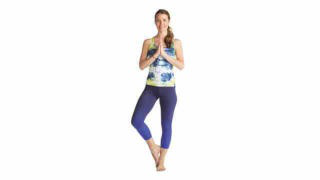

In [3]:
import tensorflow as tf
img = tf.keras.preprocessing.image.load_img('data/Train/Yoga_236.jpg')
img


In [33]:
from keras import layers
import tensorflow as tf
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])


In [34]:
import os
from keras.utils import to_categorical
import tensorflow as tf
import numpy as np
from random import shuffle

train_data = []

for i in os.listdir('/content/data/Train'):
  img = tf.keras.preprocessing.image.load_img(os.path.join('/content/data/Train',i),target_size =(128,128,3))
  img = tf.keras.utils.img_to_array(img)

  augmented_image = data_augmentation(img)
  augmented_image =tf.keras.utils.img_to_array(augmented_image)

  image_label = i.split('_')[0]

  train_data.append((img, image_label))
  train_data.append((augmented_image, image_label))




shuffle(train_data)

train_images = []
train_labels = []

for i in range(len(train_data)):
  train_images.append(train_data[i][0])
  train_labels.append(train_data[i][1])

classes = ["Basketball", "Football", "Rowing", "Swimming", "Tennis", "Yoga"]

mapping = {}
for i in range(len(classes)):
  mapping[classes[i]] = i

# integer representation
for i in range(len(train_labels)):
  train_labels[i] = mapping[train_labels[i]]

encoded_labels = to_categorical(train_labels)

train_images = np.array(train_images) 


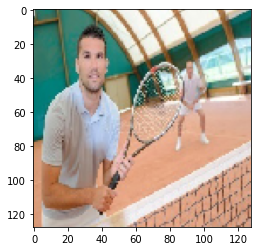

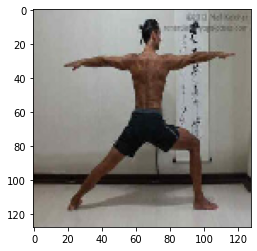

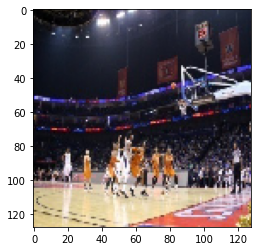

[0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 1.]


In [35]:
import matplotlib.pyplot as plt
plt.imshow(train_images[9].astype('uint8'))
plt.show()
plt.imshow(train_images[8].astype('uint8'))
plt.show()
plt.imshow(train_images[11].astype('uint8'))
plt.show()
print(encoded_labels[9])
print(encoded_labels[8])



In [36]:
import os

test_images = []
test_images_names = []
for i in os.listdir('/content/data/Test'):
  img = tf.keras.preprocessing.image.load_img(os.path.join('/content/data/Test',i),target_size =(128,128,3))
  img = tf.keras.utils.img_to_array(img)
  test_images.append(img)
  test_images_names.append(i)

test_images = np.array(test_images) 

In [ ]:
for i in encoded_labels:
  print(i)

In [37]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np

AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(128,128,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(227,227,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.5))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.5))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.5))

#Output Layer
AlexNet.add(Dense(6))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])
AlexNet.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 96)        34944     
                                                                 
 batch_normalization_18 (Bat  (None, 32, 32, 96)       384       
 chNormalization)                                                
                                                                 
 activation_18 (Activation)  (None, 32, 32, 96)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 96)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 256)       614656    
                                                                 
 batch_normalization_19 (Bat  (None, 16, 16, 256)    

In [38]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(patience=10,monitor='val_loss',restore_best_weights=True)

AlexNet.fit(train_images, encoded_labels, epochs = 30, validation_split=0.2, batch_size = 64, steps_per_epoch = train_images.shape[0]//64, callbacks = [early_stop])

Epoch 1/30
52/52 [==============================] - 4s 56ms/step - loss: 1.0723 - accuracy: 0.6420 - val_loss: 65.1743 - val_accuracy: 0.2645
Epoch 2/30
52/52 [==============================] - 2s 46ms/step - loss: 0.8049 - accuracy: 0.7678 - val_loss: 4.2441 - val_accuracy: 0.3551
Epoch 3/30
52/52 [==============================] - 2s 46ms/step - loss: 0.6785 - accuracy: 0.8214 - val_loss: 1.6426 - val_accuracy: 0.3403
Epoch 4/30
52/52 [==============================] - 2s 46ms/step - loss: 0.5882 - accuracy: 0.8533 - val_loss: 1.6359 - val_accuracy: 0.3774
Epoch 5/30
52/52 [==============================] - 2s 45ms/step - loss: 0.4886 - accuracy: 0.8979 - val_loss: 1.2133 - val_accuracy: 0.5260
Epoch 6/30
52/52 [==============================] - 2s 46ms/step - loss: 0.4052 - accuracy: 0.9243 - val_loss: 0.6739 - val_accuracy: 0.7771
Epoch 7/30
52/52 [==============================] - 2s 44ms/step - loss: 0.3414 - accuracy: 0.9449 - val_loss: 0.9697 - val_accuracy: 0.7013
Epoch 8/30
5

52/52 [==============================] - 2s 36ms/step - loss: 0.0623 - accuracy: 0.9989 - val_loss: 0.2058 - val_accuracy: 0.9554


In [ ]:
AlexNet.history.history

In [39]:
y_predictions = AlexNet.predict(test_images)
print(y_predictions)

22/22 [==============================] - 0s 10ms/step
[[0.01010732 0.01087679 0.00923774 0.00884978 0.00904805 0.95188034]
 [0.00536496 0.0086079  0.96313775 0.00637437 0.00897954 0.00753548]
 [0.04728386 0.04195761 0.03100782 0.506849   0.34419414 0.02870763]
 ...
 [0.00762544 0.9533745  0.0084513  0.00985254 0.01212409 0.00857215]
 [0.00622546 0.00809677 0.00829694 0.00624509 0.96296966 0.00816601]
 [0.00512503 0.00694094 0.00756077 0.965393   0.00668521 0.00829498]]


In [40]:
result = []
for i in y_predictions:
  result.append(np.argmax(i))

import csv
with open('result.csv', 'w', newline='') as csv_file:
      fieldnames = ['image_name', 'label']
      writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
      writer.writeheader()
      for i in range(len(result)):
          writer.writerow({'image_name': test_images_names[i], 'label': result[i]})

In [41]:
AlexNet.save('AlexNet.h5')